In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_7_image_16_4_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_12_image_4_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_7_image_9_3_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_17_image_20_3_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_20_image_5_1_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_21_image_17_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_11_image_2_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-dist

In [3]:
from collections import Counter

data_dir = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"

classes = os.listdir(data_dir)
print("Classes", classes)
classes = sorted(classes)
print("classes",classes)
class_counts = {}
for c in classes:
    class_counts[c] = len(os.listdir(os.path.join(data_dir, c)))

class_counts

Classes ['planet', 'galaxy', 'black hole', 'asteroid', 'comet', 'star', 'constellation', 'nebula']
classes ['asteroid', 'black hole', 'comet', 'constellation', 'galaxy', 'nebula', 'planet', 'star']


{'asteroid': 283,
 'black hole': 656,
 'comet': 416,
 'constellation': 1552,
 'galaxy': 3984,
 'nebula': 1192,
 'planet': 1472,
 'star': 3269}

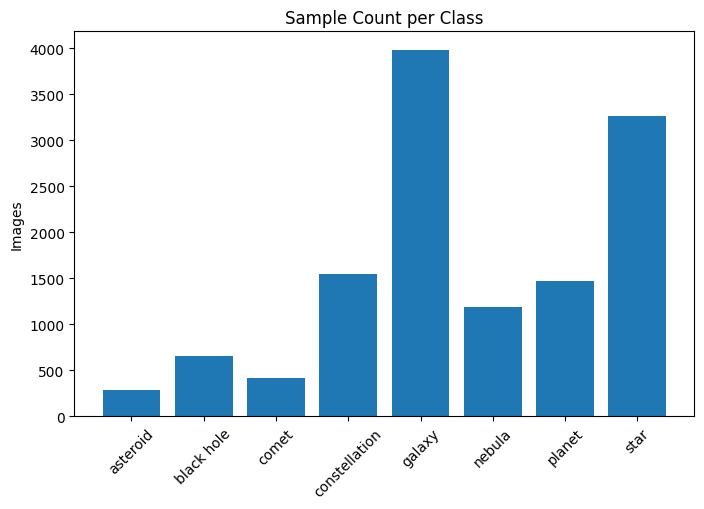

,class,count
0,asteroid,283
1,black hole,656
2,comet,416
3,constellation,1552
4,galaxy,3984
5,nebula,1192
6,planet,1472
7,star,3269


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"class": class_counts.keys(), "count": class_counts.values()})

plt.figure(figsize=(8,5))
plt.bar(df["class"], df["count"])
plt.title("Sample Count per Class")
plt.ylabel("Images")
plt.xticks(rotation=45)
plt.show()

df

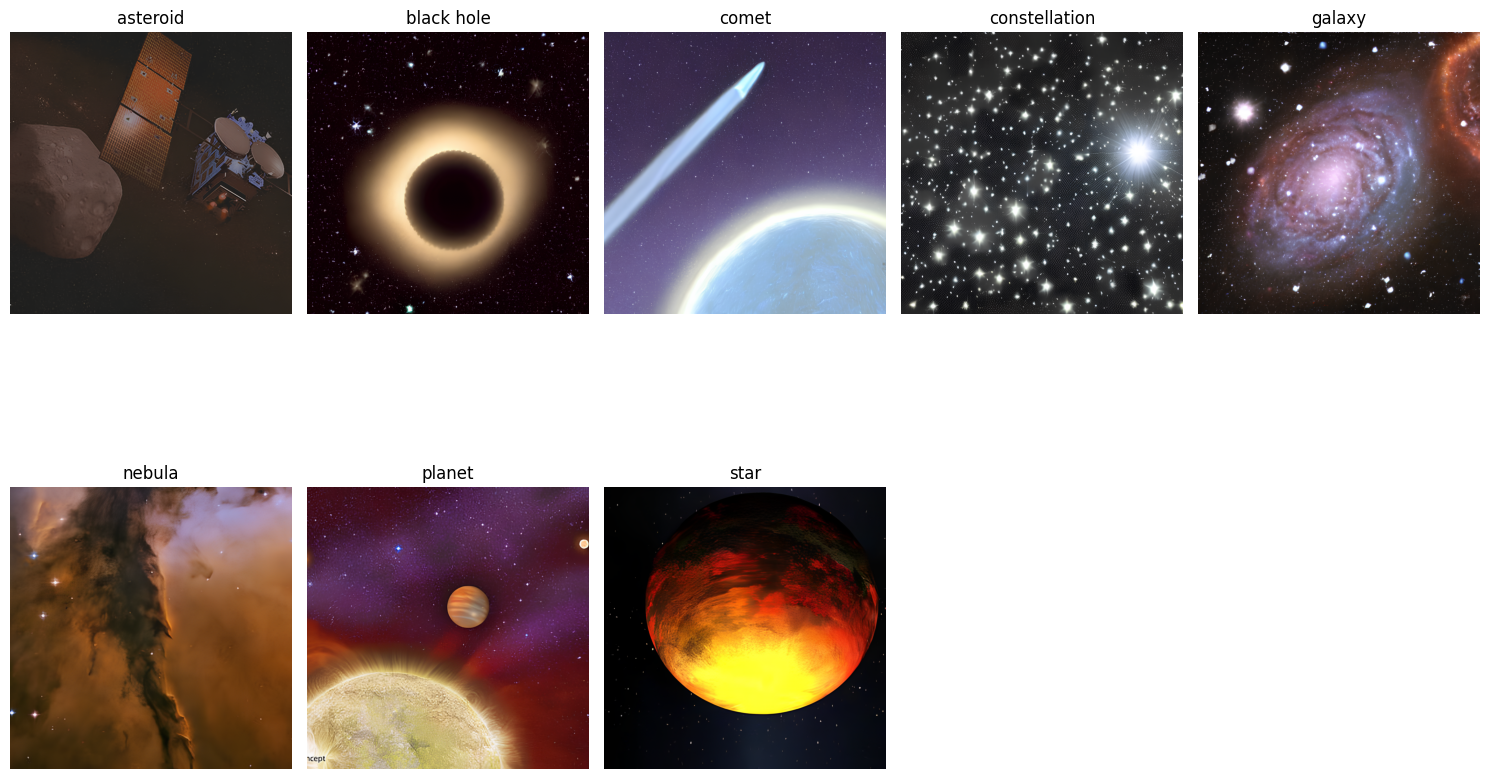

In [10]:

import random
import cv2


valid_ext = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

plt.figure(figsize=(15,10))

for i, c in enumerate(classes):
    folder = os.path.join(data_dir, c)

    files = [f for f in os.listdir(folder) if f.lower().endswith(valid_ext)]

    img_name = random.choice(files)
    img_path = os.path.join(folder, img_name)

    img = cv2.imread(img_path)

    if img is None:
        print("Could not read:", img_path)
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, len(classes)//2 + 1, i+1)
    plt.imshow(img)
    plt.title(c)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [32]:
from PIL import Image, UnidentifiedImageError


sizes = []
formats = []

for c in classes:
    folder = os.path.join(data_dir, c)

    for img_name in os.listdir(folder):
        path = os.path.join(folder, img_name)

        try:
            with Image.open(path) as img:
                sizes.append(img.size)      # (width, height)
                formats.append(img.format)  # 'JPEG', 'PNG', etc.

        except UnidentifiedImageError:
            print("⚠️ Skipping unreadable file:", path)
            continue


⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_17_aug2_SwinIR_large.png
⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_9_image_2_3_SwinIR_large.png
⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_3_image_6_SwinIR_large.png
⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_3_image_8_1_SwinIR_large.png
⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_9_image_9_aug3_SwinIR_large.png
⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_4_image_11_4_SwinIR_large.png
⚠️ S

In [33]:
res_df = pd.DataFrame(sizes, columns=["width", "height"])
fmt_df = pd.DataFrame(formats, columns=["format"])
tot_df=res_df
fmt_df

res_df.describe()


,width,height
count,11448.0,11448.0
mean,2048.0,2048.0
std,0.0,0.0
min,2048.0,2048.0
25%,2048.0,2048.0
50%,2048.0,2048.0
75%,2048.0,2048.0
max,2048.0,2048.0


In [34]:
tot_df.join(fmt_df)

,width,height,format
0,2048,2048,PNG
1,2048,2048,PNG
2,2048,2048,PNG
3,2048,2048,PNG
4,2048,2048,PNG
...,...,...,...
11443,2048,2048,PNG
11444,2048,2048,PNG
11445,2048,2048,PNG
11446,2048,2048,PNG


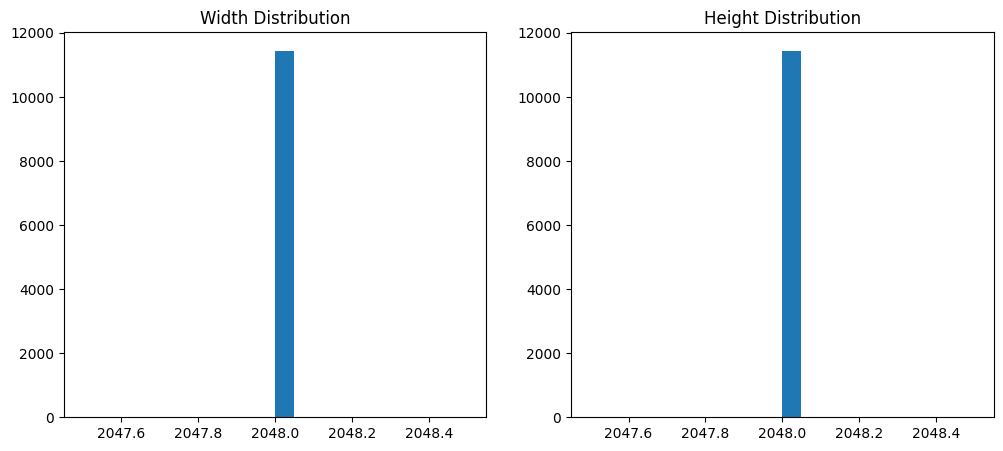

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(res_df["width"], bins=20)
plt.title("Width Distribution")

plt.subplot(1,2,2)
plt.hist(res_df["height"], bins=20)
plt.title("Height Distribution")

plt.show()


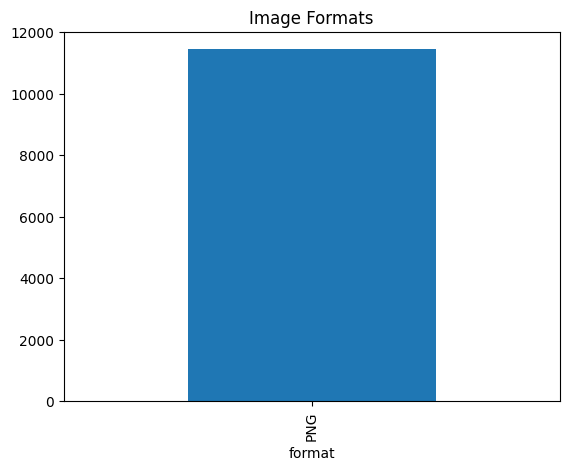

In [36]:
fmt_df["format"].value_counts().plot(kind="bar")
plt.title("Image Formats")
plt.show()


In [41]:
from PIL import Image, UnidentifiedImageError
import os

modes = []

# valid image extensions
valid_ext = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

for c in classes:
    folder = os.path.join(data_dir, c)

    for img_name in os.listdir(folder):

        # ---- skip files that are NOT images ----
        if not img_name.lower().endswith(valid_ext):
            continue

        path = os.path.join(folder, img_name)

        try:
            # ---- try opening the image ----
            with Image.open(path) as img:
                modes.append(img.mode)

        # ---- if image cannot be read, SKIP it ----
        except UnidentifiedImageError:
            print("⚠️ Skipping unreadable file:", path)
            continue


⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_8_image_17_aug2_SwinIR_large.png
⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_9_image_2_3_SwinIR_large.png
⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_3_image_6_SwinIR_large.png
⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_3_image_8_1_SwinIR_large.png
⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_9_image_9_aug3_SwinIR_large.png
⚠️ Skipping unreadable file: /kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/galaxy/galaxy_page_4_image_11_4_SwinIR_large.png
⚠️ S

In [42]:
pd.Series(modes).value_counts()


RGB    11448
Name: count, dtype: int64

Checking how many images are corrupted 


In [45]:
import os
import pandas as pd
from PIL import Image, UnidentifiedImageError

valid_ext = (".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".webp")

results = []

for c in classes:
    folder = os.path.join(data_dir, c)

    # all files in the folder
    all_files = [
        f for f in os.listdir(folder)
        if os.path.isfile(os.path.join(folder, f))
    ]
    total_files = len(all_files)

    # files that look like images
    img_files = [
        f for f in all_files
        if f.lower().endswith(valid_ext)
    ]
    candidate_images = len(img_files)

    zero_byte = 0
    unreadable = 0

    for f in img_files:
        path = os.path.join(folder, f)

        # ---- check zero-byte ----
        if os.path.getsize(path) == 0:
            zero_byte += 1
            continue

        # ---- check whether PIL can read it ----
        try:
            with Image.open(path) as img:
                img.verify()   # validate file contents
        except Exception:
            unreadable += 1
            continue

    good = candidate_images - zero_byte - unreadable
    bad_total = zero_byte + unreadable
    bad_pct = (bad_total / candidate_images * 100) if candidate_images else 0

    results.append({
        "class": c,
        "total files": total_files,
        "image-like files": candidate_images,
        "zero-byte images": zero_byte,
        "unreadable images": unreadable,
        "bad images total": bad_total,
        "good images": good,
        "% bad images": round(bad_pct, 2)
    })

df_quality = pd.DataFrame(results)
df_quality


,class,total files,image-like files,zero-byte images,unreadable images,bad images total,good images,% bad images
0,asteroid,283,283,0,0,0,283,0.00
1,black hole,656,656,0,0,0,656,0.00
2,comet,416,416,0,0,0,416,0.00
3,constellation,1552,1552,0,0,0,1552,0.00
4,galaxy,3984,3984,1376,0,1376,2608,34.54
5,nebula,1192,1192,0,0,0,1192,0.00
6,planet,1472,1472,0,0,0,1472,0.00
7,star,3269,3269,0,0,0,3269,0.00
